In [112]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = load_digits()

In [61]:
y = df.target
X = df.data

In [48]:
model = DecisionTreeClassifier()

In [50]:
cross_val_score(model,X,y,cv=5,n_jobs=-1).mean()

0.790803156917363

In [56]:
cross_val_score(BaggingClassifier(model,n_estimators=100),X,y,cv=5,n_jobs=-1).mean()

0.9070829464562055

In [86]:
cross_val_score(BaggingClassifier(model,n_estimators=100,max_features=int(np.sqrt(64))),X,y,cv=5,n_jobs=-1).mean()
# один раз выбираем подмножество фичей

0.918769730733519

In [93]:
cross_val_score(BaggingClassifier(DecisionTreeClassifier(max_features='auto'),n_estimators=100),X,y,cv=5,n_jobs=-1).mean()
# подмножество признаков выбирается при построении каждой вершины дерева
# в точности RandomForest

0.9443655215103683

In [123]:
scores=[]
features=[]
for i in range(64):
    features.append(i+1)
    scores.append(cross_val_score(RandomForestClassifier(random_state=0,max_depth=i),X,y,cv=5,n_jobs=-1).mean())

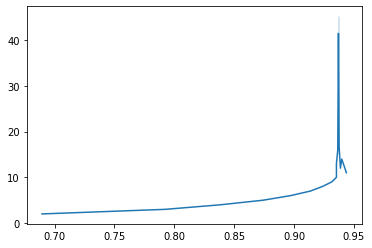

In [124]:
sns.lineplot(scores,features)

In [ ]:
2 3 4 7